# Imports

##### General imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

In [2]:
import networkx as nx

##### Import from flatland environment 

In [3]:
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import *
from flatland.envs.rail_generators import complex_rail_generator,rail_from_manual_specifications_generator,random_rail_generator, RailGenerator
from flatland.envs.schedule_generators import complex_schedule_generator, random_schedule_generator, ScheduleGenerator
from flatland.utils.rendertools import RenderTool

##### Import from our framework

In [5]:
#from src.graph import NetworkGraph
from src.flows import TimeNetwork

# Test of time expanded network

##### Create a dummy network

In [6]:
g = nx.DiGraph()
g.add_node(1,pos = (0,-1),type_node = 's1')
g.add_node(3,pos = (0,1),type_node = 's2')
g.add_node(2,pos = (1,0))
g.add_node(4,pos = (2,0))
g.add_node(5,pos = (3,1), type_node = 't1')
g.add_node(6,pos = (3,-1), type_node = 't2')
g.add_edges_from([(1,2),(3,2),(2,4),(4,5),(4,6)],capacity = 1, weight = 1)

In [7]:
g.node[2]

{'pos': (1, 0)}

In [8]:
for node in g.nodes():
    print(node,type(node))

1 <class 'int'>
3 <class 'int'>
2 <class 'int'>
4 <class 'int'>
5 <class 'int'>
6 <class 'int'>


In [9]:
for edge in g.edges:
    print(edge,type(edge),g[edge[0]][edge[1]])

(1, 2) <class 'tuple'> {'capacity': 1, 'weight': 1}
(3, 2) <class 'tuple'> {'capacity': 1, 'weight': 1}
(2, 4) <class 'tuple'> {'capacity': 1, 'weight': 1}
(4, 5) <class 'tuple'> {'capacity': 1, 'weight': 1}
(4, 6) <class 'tuple'> {'capacity': 1, 'weight': 1}


/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


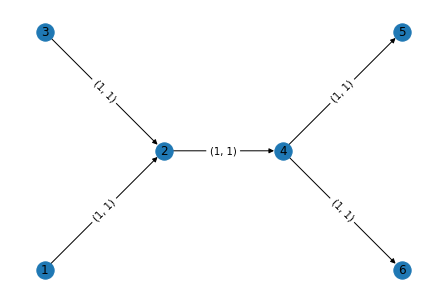

In [10]:
pos=nx.get_node_attributes(g,'pos')
nx.draw(g,pos, with_labels = True)
weights = nx.get_edge_attributes(g,'weight')
capacities = nx.get_edge_attributes(g,'capacity')
labels = {}
for key in weights.keys():
    labels[key] = (weights[key],capacities[key])
_ = nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)

##### create a time expanded network

In [36]:
TestNetworkTime = TimeNetwork(g)

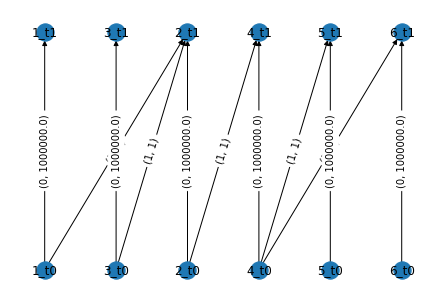

In [37]:
TestNetworkTime.show()

In [38]:
g_test = TestNetworkTime.build_base_layer()

error in the time step asked, correcting from 0 to 2


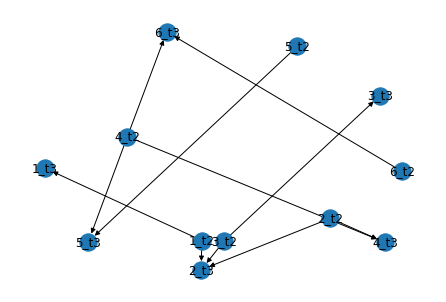

In [39]:
nx.draw(g_test, with_labels = True)

In [40]:
g_test.nodes

NodeView(('1_t2', '1_t3', '3_t2', '3_t3', '2_t2', '2_t3', '4_t2', '4_t3', '5_t2', '5_t3', '6_t2', '6_t3'))

In [41]:
TestNetworkTime.basis_layer.nodes

NodeView(('1_t0', '1_t1', '3_t0', '3_t1', '2_t0', '2_t1', '4_t0', '4_t1', '5_t0', '5_t1', '6_t0', '6_t1'))